<a href="https://colab.research.google.com/github/mixa15341/Data_Minimg/blob/main/5/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%965_Random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Практическая работа №5. Random forest**

# Задание 1. Обучите классификатор Random Forest для решения задачи бинарной классификации: для каждого человека научиться предсказывать, выживет ли он при крушении Титаника.

Ссылка на датасет: https://www.kaggle.com/c/titanic/data

## 1. Устанавливаем зависимости

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

## 2. Импортируем датасет

In [3]:
df = pd.read_csv('/content/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. Производим разведовательный анализ данных


Получим представление о данных в датасете:

In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## 4. Сформируем обучающую и тестовую выборки:


In [7]:
from sklearn.model_selection import train_test_split

X = df.drop(['Survived', 'Name', 'PassengerId', 'Ticket', 'Fare'], axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 7), (179, 7), (712,), (179,))

## 5. Feature Engineering

Поработаем с признаками, выделим важные, изменим форму их представления (при надобности)

In [9]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 2.0 MB/s eta 0:00:00


In [10]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['Sex', 'Cabin', 'Embarked'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
331,1,1,45.5,0,0,1,1
733,2,1,23.0,0,0,118,1
382,3,1,32.0,0,0,118,1
704,3,1,26.0,1,0,118,1
813,3,2,6.0,4,2,118,1


In [13]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

feature_scores = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

,0
Age,0.316237
Sex,0.297906
Cabin,0.130238
Pclass,0.099305
SibSp,0.065909
Parch,0.046733
Embarked,0.043671


## 6. Построение базовой модели:

In [14]:
rfc = RandomForestClassifier(n_estimators=10, random_state=1)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

## 7. Оценка точности модели:

### 7.1. Напишите функцию, принимающую на вход аргументы y_pred, y_test и выполняющую визуализацию матрицы ошибок и отчета классификации

In [15]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

def count_metrics(test, prediction):
  cm = confusion_matrix(test, prediction)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt=".0f", cmap='Blues')
  plt.title('Confusion Matrix')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()
  print()
  print(classification_report(test, prediction))

### 7.2. Оцените точность модели:

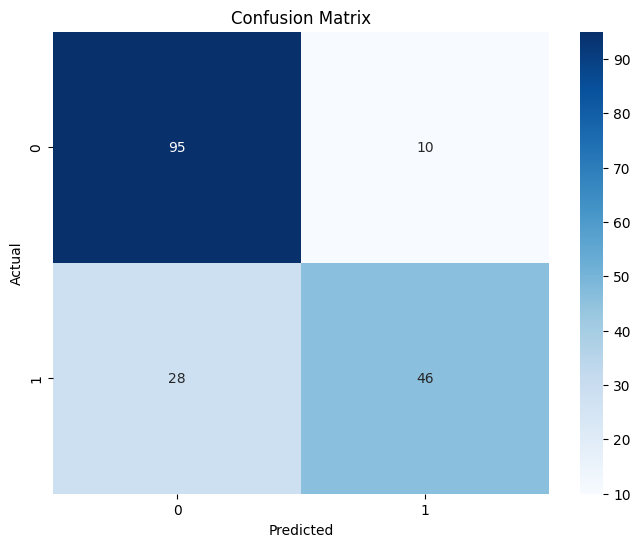


              precision    recall  f1-score   support

           0       0.77      0.90      0.83       105
           1       0.82      0.62      0.71        74

    accuracy                           0.79       179
   macro avg       0.80      0.76      0.77       179
weighted avg       0.79      0.79      0.78       179



In [16]:
y_pred = rf.predict(X_test)

count_metrics(y_test, y_pred)

## 8. Тюнинг гиперпараметров модели:

RandomSearchCV

In [17]:
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

n_estimators = [int(x) for x in np.linspace(start=10, stop=200, num=10)]
max_depth = [int(x) for x in np.linspace(1, 300, num=5)]
max_depth.append(None)
max_leaf_nodes = [int(i) for i in range(1, 500)]

random_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'max_leaf_nodes': max_leaf_nodes,
}

rf_clf = RandomForestClassifier(random_state=0)

rf_rand = RandomizedSearchCV(
    estimator=rf_clf,                # модель для настройки
    param_distributions=random_grid, # словарь с параметрами для случайного поиска
    n_iter=300,                      # количество итераций (случайных наборов гиперпараметров)
    scoring='accuracy',              # метрика для оценки качества моделей
    cv=5,                            # количество фолдов для кросс-валидации
    verbose=1,                       # уровень детализации вывода
    random_state=42,                 # фиксированный сид для воспроизводимости результатов
    n_jobs=-1                        # использование всех доступных ядер процессора
)

rf_rand.fit(X_train, y_train)

rf_best_params = rf_rand.best_params_
print(f"Лучшие параметры: {rf_best_params}")

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Лучшие параметры: {'n_estimators': 31, 'max_leaf_nodes': 31, 'max_depth': 300}


GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

rf_clf = RandomForestClassifier(random_state=0)

rf_grid = GridSearchCV(
    estimator=rf_clf,                # модель для настройки
    param_grid=random_grid, # словарь с параметрами для случайного поиска
    scoring='accuracy',              # метрика для оценки качества моделей
    cv=5,                            # количество фолдов для кросс-валидации
    verbose=1,                       # уровень детализации вывода
    n_jobs=-1                        # использование всех доступных ядер процессора
)

rf_grid.fit(X_train, y_train)

rf_grid_best_params = rf_grid.best_params_
print(f"Лучшие параметры: {rf_grid_best_params}")

Fitting 5 folds for each of 29940 candidates, totalling 149700 fits


## 9. Оценка лучшей модели:

In [ ]:
from sklearn.metrics import accuracy_score

rf1 = RandomForestClassifier()
rf1.fit(X_train, y_train)

y_pred1 = rf1.predict(X_test)

print('Оценка точности базовой модели: {0:0.4f}'.format(accuracy_score(y_test, y_pred1)))
count_metrics(y_test, y_pred1)

# Задание 2. Решите задачу из предыдущего пункта используя другие, ранее пройденные классификаторы. Сравните их точность предсказания с Random Forest

In [ ]:
rf2 = RandomForestClassifier(**rf_best_params)
rf2.fit(X_train, y_train)

y_pred2 = rf2.predict(X_test)

print('Оценка точности модели при подборе параметров с помощью RandomizedSearchCV: {0:0.4f}'.format(accuracy_score(y_test, y_pred2)))
count_metrics(y_test, y_pred2)

In [ ]:
from sklearn.metrics import accuracy_score

rf3 = RandomForestClassifier(**rf_grid_best_params)
rf3.fit(X_train, y_train)

y_pred3 = rf3.predict(X_test)

print('Оценка точности модели при подборе параметров с помощью GridSearchCV: {0:0.4f}'.format(accuracy_score(y_test, y_pred3)))
count_metrics(y_test, y_pred3)

# Задание 2.1*. Реализуйте функцию, для взаимодействия с обученной Вами моделью

* Функция должна принимать на вход обученную модель классификатора;

* После вызова функции, у пользователя через консоль запрашиваются значения признаков. При запросе значений нужно вывести пояснения о типе и диапазоне возможных значений. Также реализуйте обработку исключений;

* После ввода значений для всех признаков в консоль, выводится результат работы классификатора.

In [ ]:
print(encoder.get_feature_names)




In [ ]:
y_pred = rf3.predict(X_test)

In [ ]:
def predict(model):
  data = pd.DataFrame([{'Pclass': 0,	'Sex': 0, 'Age': 0,	'SibSp': 0,	'Parch': 0,
                        'Cabin': 0,	'Embarked': 0}])
  print('Введите значение \'Pclass\' (билетный класс). Возможные значения:', X_train['Pclass'].unique())
  while not 1 <= (a := int(input())) <= 3 :
    print('Введите одно из возможных значений \'Pclass\':', X_train['Pclass'].unique())
  data['Pclass'] = a
  print('Введите значение \'Sex\' (пол). Возможные значения -', X_train['Sex'].unique(),
        ', где 1 - мужчина, 2 - женщина')
  while not 1 <= (a := int(input())) <= 2 :
    print('Введите одно из возможных значений \'Sex\':', X_train['Sex'].unique())
  data['Sex'] = a
  print('Введите значение \'Age\' (возраст). Диапазон возможных значений: [2, 80]')
  while not 2 <= (a := int(input())) <= 80 :
    print('Введите значение \'Age\' из диапазона [2, 80]:')
  data['Age'] = a
  print('Введите значение \'SibSp\' (количество братьев/сестер/супругов на борту). Диапазон возможных значений: [0, 8]')
  while not 0 <= (a := int(input())) <= 8 :
    print('Введите значение \'SibSp\' из диапазона [0, 8]:')
  data['SibSp'] = a
  print('Введите значение \'Parch\' (количество родителей/детей на борту). Диапазон возможных значений: [0, 6]')
  while not 0 <= (a := int(input())) <= 6 :
    print('Введите значение \'Parch\' из диапазона [0, 6]:')
  data['Parch'] = a
  print('Введите значение \'Cabin\' (номер каюты). Диапазон возможных значений: [1, 112]')
  while not 1 <= (a := int(input())) <= 112 :
    print('Введите значение \'Cabin\' из диапазона [1, 112]:')
  data['Cabin'] = a
  print('Введите значение \'Embarked\' (порт посадки на судно). Возможные значения -',
        X_train['Embarked'].unique(), ', где 1 - Southampton, 2 - Cherbourg, 3 - Queenstown, 4 - не установлено')
  while not 1 <= (a := int(input())) <= 4 :
    print('Введите одно из возможных значений \'Embarked\':', X_train['Embarked'].unique())
  data['Embarked'] = a
  prediction = model.predict(data)
  print()
  print('С вероятностью {0:0.4f} пассажир с заданными характеритиками:'.format(accuracy_score(y_test, y_pred)))
  print('не выжил') if prediction == 0 else print('выжил')

predict(rf3)

# Задание 3. Решите задачу регрессии, используя [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html).

* Для выполнения данного задания можете использовать **любой датасет**



In [ ]:
# Ваш код